In [1]:
__version__ = '0.3'
__author__  = "Robert Matern (r.matern@stud.uni-hannover.de)"
__date__    = ''
__url__     = ''
__copyright__ = "(C) 2015 Robert Matern"

#Beispieldaten Nr. 1

In [2]:
%run Parameter.ipynb
%run DynamicProgramm.ipynb

In [3]:
# Produkte
products = Product(3)

# Ressourcen
resources = Resource(1)

#Kapazität
capacities = Capacity(resources)
capacities[1] = 2

# Ressourcenverbrauch
consumtions = Consumption(products, resources)
consumtions[1] = [0,1]
consumtions[2] = [0,2]
consumtions[3] = [0,3]

# Erträge
revenues = Revenue(products)
revenues[1] = 100
revenues[2] = 500
revenues[3] = 1000

# Buchungshorizont
times = Time(3)

# Wahrscheinlichkeiten
probs = Prob(products, times)
probs[1] = [0, 0.1, 0.1, 0.1]
probs[2] = [0, 0.1, 0.1, 0.1]
probs[3] = [0, 0.1, 0.1, 0.1]

# Gegenwahrscheinlichkeiten
against_probs = Against_Prob(probs)

# Systemzustände
conditions = Condition(capacities, resources, times)

# Endzeitpunkte
#end_times = End_Time(conditions)

0:00:00.000394


In [4]:
import datetime
a = datetime.datetime.now()
print DP(solutions, conditions, products, resources, capacities, consumtions, times)
print datetime.datetime.now()-a

149.09
0:00:00.003765


In [5]:
# Erstellung der Struktur als NetworkX-Graph
graph = Structure(solutions, products, consumtions, revenues, probs)

# Ermittlung der besten Politik (Dijkstra Algorithmus)
best_politic = Best_Politic(graph, times)

Kürzester Pfad: [3, 10, 9, 8] 

Startzustand: {'time': 3, 'capacity': array([2]), 'value': 149.09, 'label': array([2, 3])} 

Die beste Politik zum Zeitpunkt 3 ist die Annahme des Auftrags:
{2: {'goal': array([0, 2]), 'weight': 0.0, 'revenue': 500}} 

Die beste Politik zum Zeitpunkt 2 ist die Annahme des Auftrags:
{0: {'goal': array([0, 1]), 'weight': 0.0, 'revenue': 0}} 

Die beste Politik zum Zeitpunkt 1 ist die Annahme des Auftrags:
{0: {'goal': array([0, 0]), 'weight': 0, 'revenue': 0}} 



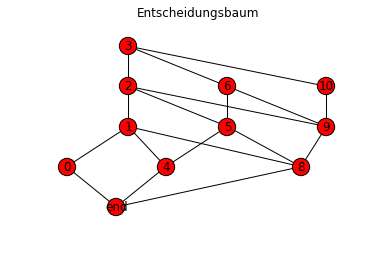

In [9]:
Drawing(graph)